# Fábio Henrique S. S. Tavares

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [385]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [386]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [387]:
# solução
## importando arquivo
filmes = pd.read_csv('movies.csv')

In [388]:
# renomeando colunas
filmes.columns = ['filmeId','titulo', 'generos']

In [389]:
# configurando o indice
filmes = filmes.set_index('filmeId')

In [390]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [391]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [392]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [393]:
# solução
# lendo o arquivo notas
notas = pd.read_csv('ratings.csv')

In [394]:
# renomeando as colunas
notas.columns = ['usuarioId','filmeId','nota', 'momento']

In [395]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [396]:
# solução
# adicionando a columa nota_media ao dataframe filmes
filmes['nota_media'] = notas.groupby("filmeId").nota.mean()

In [397]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [398]:
# solução para calcular o total de votos por filme
len(notas.filmeId)

100836

In [399]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas['filmeId'].value_counts()

In [400]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429,49.0


In [401]:
# removendo filmes com 49 ou menos votos
filmes = filmes.query('total_de_votos > 49')

In [402]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

In [403]:
# mudando cor e estilo do gráfico
sns.set_palette("Dark2")
sns.set_style('ticks')

In [404]:
nota_media = filmes.nota_media.dropna()

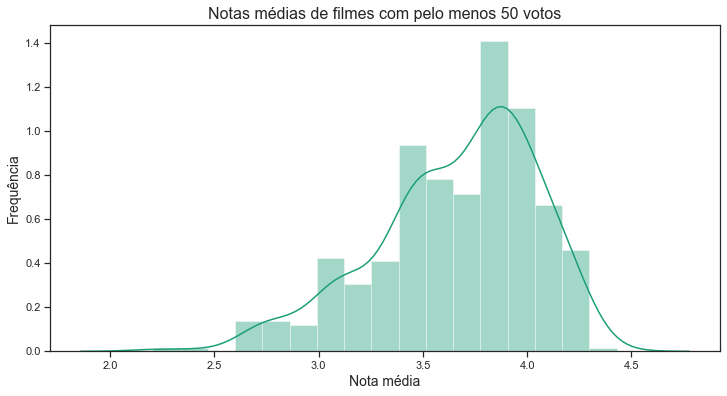

In [405]:
# solução histograma
notas_medias_hist = sns.distplot(nota_media)
notas_medias_hist.set_xlabel('Nota média', fontsize = 14)
notas_medias_hist.set_ylabel('Frequência', fontsize = 14)
notas_medias_hist.set_title('Notas médias de filmes com pelo menos 50 votos', fontsize = 16)
notas_medias_hist.figure.set_size_inches(12,6)

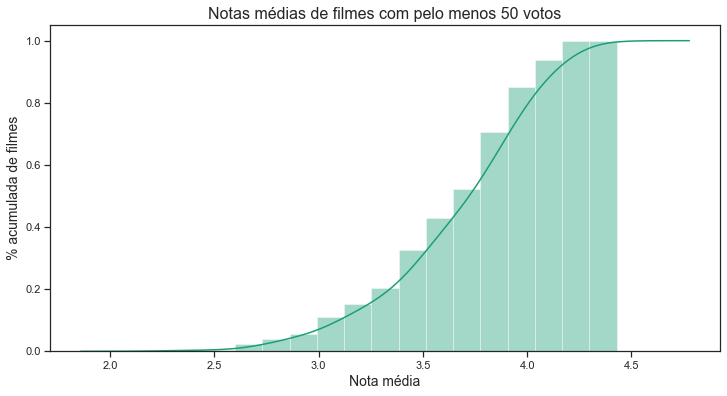

In [406]:
# solução cumulativa
notas_medias_cumul = sns.distplot(nota_media, 
                  hist_kws = {'cumulative':True},
                     kde_kws = {'cumulative':True})
notas_medias_cumul.set_xlabel('Nota média', fontsize = 14)
notas_medias_cumul.set_ylabel('% acumulada de filmes', fontsize = 14)
notas_medias_cumul.set_title('Notas médias de filmes com pelo menos 50 votos',fontsize = 16)
notas_medias_cumul.figure.set_size_inches(12,6)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

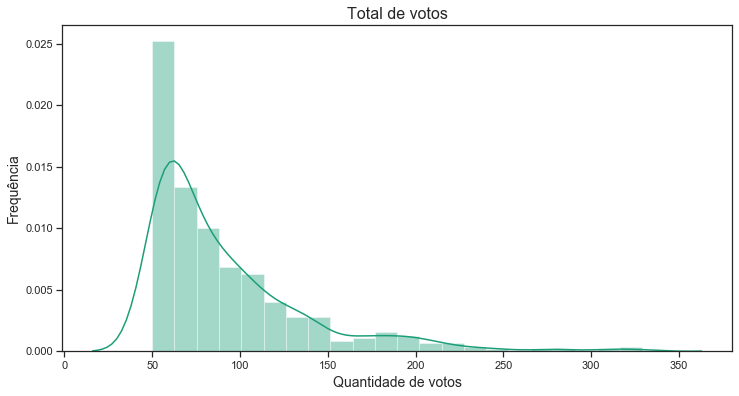

In [407]:
# solução histograma
total_de_votos_hist = sns.distplot(filmes['total_de_votos'])
total_de_votos_hist.set_xlabel('Quantidade de votos', fontsize = 14)
total_de_votos_hist.set_ylabel('Frequência', fontsize = 14)
total_de_votos_hist.set_title('Total de votos', fontsize = 16)
total_de_votos_hist.figure.set_size_inches(12,6)

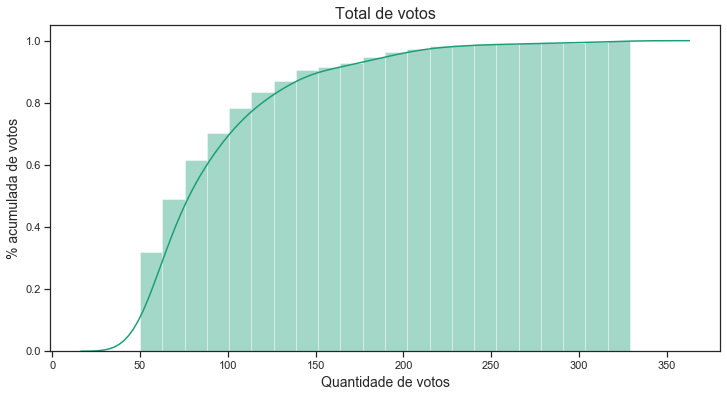

In [408]:
# solução cumulativa
total_de_votos_cumul = sns.distplot(filmes['total_de_votos'], 
                  hist_kws = {'cumulative':True},
                     kde_kws = {'cumulative':True})
total_de_votos_cumul.set_xlabel('Quantidade de votos', fontsize = 14)
total_de_votos_cumul.set_ylabel('% acumulada de votos', fontsize = 14)
total_de_votos_cumul.set_title('Total de votos',fontsize = 16)
total_de_votos_cumul.figure.set_size_inches(12,6)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [409]:
# solução
nota_limite_dos_20_porcento = nota_media.quantile(.2)
nota_limite_dos_20_porcento

3.3742857142857146

In [410]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [411]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [412]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [413]:
# solução
# definindo uma variável para soma de valores e classificação de valores decrescentes
generos_sum = generos.sum().sort_values(ascending = False)

Text(0.5, 1.0, 'Filmes por gênero')

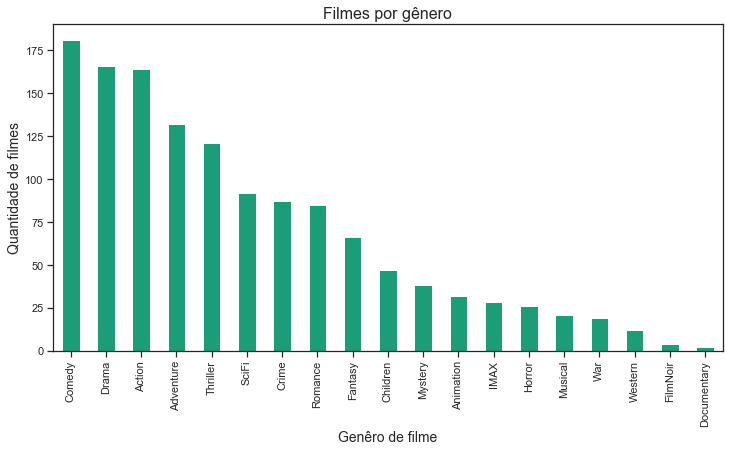

In [414]:
# gráfico de barras
generos_bar = generos_sum.plot(kind = 'bar')
generos_bar.figure.set_size_inches(12,6)
generos_bar.set_xlabel('Genêro de filme', fontsize = 14)
generos_bar.set_ylabel('Quantidade de filmes', fontsize = 14)
generos_bar.set_title('Filmes por gênero',fontsize = 16)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [415]:
# solução
top5_generos_em_quantidade_de_filmes = generos_sum.sort_values(ascending = False).head(5)

In [416]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [417]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [418]:
# solucão
# definindo variável com soma de notas por gênero e classificando do maior para o menor
votos_por_genero_por_filme_sum = votos_por_genero_por_filme.sum().sort_values(ascending = False)
votos_por_genero_por_filme_sum

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

Text(0.5, 1.0, 'Filmes por gênero')

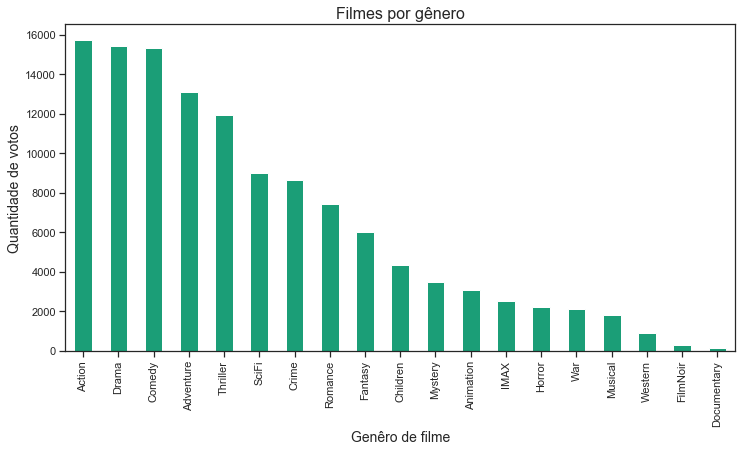

In [419]:
# solução
# gráfico de barras
votos_por_genero_por_filme_bar = votos_por_genero_por_filme_sum.plot(kind = 'bar')
votos_por_genero_por_filme_bar.figure.set_size_inches(12,6)
votos_por_genero_por_filme_bar.set_xlabel('Genêro de filme', fontsize = 14)
votos_por_genero_por_filme_bar.set_ylabel('Quantidade de votos', fontsize = 14)
votos_por_genero_por_filme_bar.set_title('Filmes por gênero',fontsize = 16)


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [420]:
# solucao código
# calculando quantidade de votos dividido pelo total de filmes em cada gênero
media_votos_por_filme_por_genero = (votos_por_genero_por_filme / generos_sum).sum().sort_values(ascending = False)
media_votos_por_filme_por_genero

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

Text(0.5, 1.0, 'Média de votos por gênero de filmes')

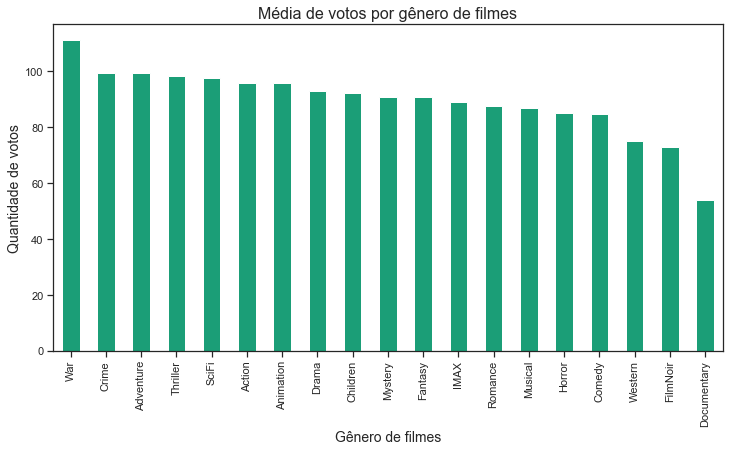

In [421]:
# solução com visualização 
# gráfico de barras
media_votos_por_filme_por_genero_bar = media_votos_por_filme_por_genero.plot(kind = 'bar')
media_votos_por_filme_por_genero_bar.figure.set_size_inches(12,6)
media_votos_por_filme_por_genero_bar.set_xlabel('Gênero de filmes', fontsize = 14)
media_votos_por_filme_por_genero_bar.set_ylabel('Quantidade de votos', fontsize = 14)
media_votos_por_filme_por_genero_bar.set_title('Média de votos por gênero de filmes',fontsize = 16)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre): A gênero "War" possui muito menos votos e quantidade de filmes em comparação ao gênero "Action". Porém, em média os filmes do gênero "War" recebem mais votos em comparação ao gênero "Action".
    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [422]:
#importanto matplotlib
import matplotlib.pyplot as plt

In [423]:
# definindo variáveis para selecionar apenas linhas em que os gêneros sejam maior que 0
total_action = votos_por_genero_por_filme[votos_por_genero_por_filme['Action'] > 0]
total_adventure = votos_por_genero_por_filme[votos_por_genero_por_filme['Adventure'] > 0]
total_animation = votos_por_genero_por_filme[votos_por_genero_por_filme['Animation'] > 0]
total_children = votos_por_genero_por_filme[votos_por_genero_por_filme['Children'] > 0]
total_comedy = votos_por_genero_por_filme[votos_por_genero_por_filme['Comedy'] > 0]
total_crime = votos_por_genero_por_filme[votos_por_genero_por_filme['Crime'] > 0]
total_documentary = votos_por_genero_por_filme[votos_por_genero_por_filme['Documentary'] > 0]
total_drama = votos_por_genero_por_filme[votos_por_genero_por_filme['Drama'] > 0]
total_fantasy = votos_por_genero_por_filme[votos_por_genero_por_filme['Fantasy'] > 0]
total_filmnoir = votos_por_genero_por_filme[votos_por_genero_por_filme['FilmNoir'] > 0]
total_horror = votos_por_genero_por_filme[votos_por_genero_por_filme['Horror'] > 0]
total_imax = votos_por_genero_por_filme[votos_por_genero_por_filme['IMAX'] > 0]
total_musical = votos_por_genero_por_filme[votos_por_genero_por_filme['Musical'] > 0]
total_mystery = votos_por_genero_por_filme[votos_por_genero_por_filme['Mystery'] > 0]
total_romance = votos_por_genero_por_filme[votos_por_genero_por_filme['Romance'] > 0]
total_scifi = votos_por_genero_por_filme[votos_por_genero_por_filme['SciFi'] > 0]
total_thriller = votos_por_genero_por_filme[votos_por_genero_por_filme['Thriller'] > 0]
total_war = votos_por_genero_por_filme[votos_por_genero_por_filme['War'] > 0]
total_western = votos_por_genero_por_filme[votos_por_genero_por_filme['Western'] > 0]
total_votos_tratado = ['total_action','total_adventure','total_animation','total_children',
                       'total_comedy','total_crime','total_documentary','total_drama','total_fantasy',
                       'total_filmnoir','total_horror','total_imax','total_musical','total_mystery',
                       'total_romance','total_scifi','total_thriller','total_war','total_western']


Text(0.5, 1.0, 'Distribuição de total de votos para os gêneros Horror e Adventure')

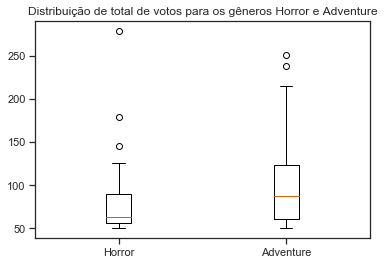

In [424]:
# solução:
# plotando gráfico boxplot para os filmes do gênero Horror e Adventure
plt.boxplot([total_horror['Horror'], total_adventure['Adventure']], labels = ['Horror', 'Adventure'])
plt.title('Distribuição de total de votos para os gêneros Horror e Adventure')

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [425]:
generos.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],
      dtype='object')

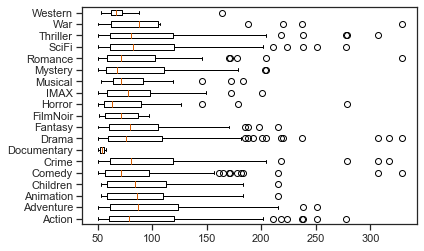

In [426]:
# plotando o boxplot
total_de_votos_box = plt.boxplot([total_action['Action'],total_adventure['Adventure'],total_animation['Animation'],total_children['Children'],
                       total_comedy['Comedy'],total_crime['Crime'],total_documentary['Documentary'],total_drama['Drama'],
                       total_fantasy['Fantasy'],total_filmnoir['FilmNoir'],total_horror['Horror'],total_imax['IMAX'],
                       total_musical['Musical'],total_mystery['Mystery'],total_romance['Romance'],
                       total_scifi['SciFi'],total_thriller['Thriller'],total_war['War'],total_western['Western']], 
                       labels = ['Action','Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
                       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],vert = False,)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: Baseado no total de votos, filmes da categoria "adventure" possuem um desempenho melhor em comparação a filmes "Horror". 
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Histograma de filmes de aventura')

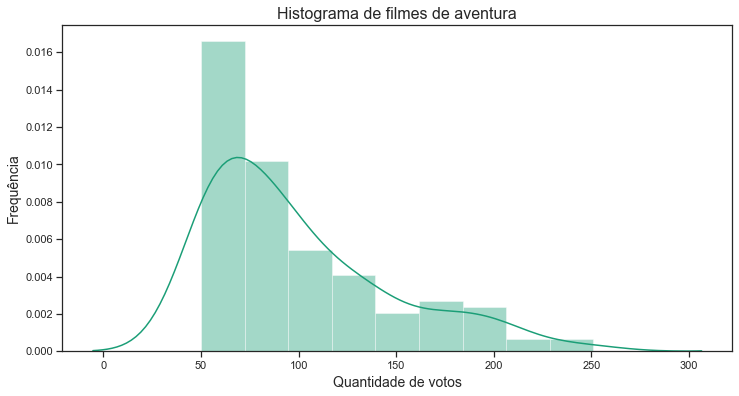

In [427]:
# solucao histograma de aventura
total_adventure_hist = sns.distplot(total_adventure['Adventure'], norm_hist = False, kde = True)
total_adventure_hist.figure.set_size_inches(12,6)
total_adventure_hist.set_xlabel('Quantidade de votos', fontsize = 14)
total_adventure_hist.set_ylabel('Frequência', fontsize = 14)
total_adventure_hist.set_title('Histograma de filmes de aventura',fontsize = 16)

Text(0.5, 1.0, 'Histograma de filmes de horror')

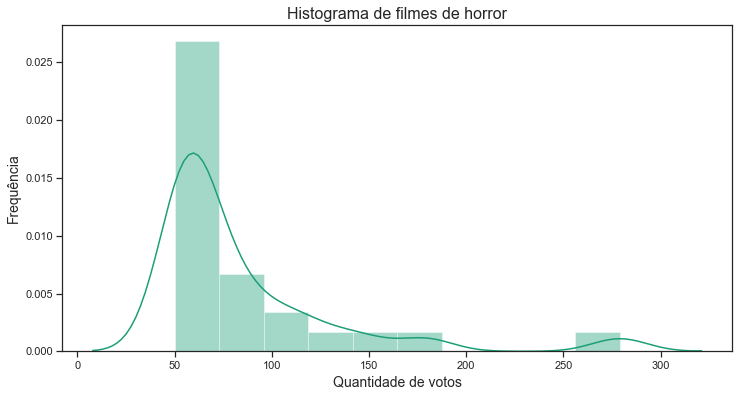

In [428]:
# solucao histograma de horror
total_horror_hist = sns.distplot(total_horror['Horror'], norm_hist = False, kde = True)
total_horror_hist.figure.set_size_inches(12,6)
total_horror_hist.set_xlabel('Quantidade de votos', fontsize = 14)
total_horror_hist.set_ylabel('Frequência', fontsize = 14)
total_horror_hist.set_title('Histograma de filmes de horror',fontsize = 16)

In [429]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

In [430]:
# importando stats da biblioteca scipy
import scipy.stats as stats

In [431]:
# testando normalidade do conjunto de dados de filmes de adventure
shapiro_stat, shapiro_p_value = stats.shapiro(total_adventure)
print("O valor estatístico de Shapiro-Wilk é " + str(shapiro_stat))
print("O valor de p de Shapiro-Wilk é " + str(shapiro_p_value))

O valor estatístico de Shapiro-Wilk é 0.509732723236084
O valor de p de Shapiro-Wilk é 0.0


In [432]:
# conclusão do teste de normalidade de filmes de adventure
if shapiro_p_value > 0.05:
    print("Com 95% de confiança, os dados seguem uma distribuição normal segundo o teste de Shapiro-Wilk")
else:
    print("Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk")

Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk


In [433]:
# testando normalidade do conjunto de dados de filmes de horror
shapiro_stat, shapiro_p_value = stats.shapiro(total_horror)
print("O valor estatístico de Shapiro-Wilk é " + str(shapiro_stat))
print("O valor de p de Shapiro-Wilk é " + str(shapiro_p_value))

O valor estatístico de Shapiro-Wilk é 0.42745596170425415
O valor de p de Shapiro-Wilk é 8.988762403025343e-37


In [434]:
# conclusão do teste de normalidade de filmes de horror
if shapiro_p_value > 0.05:
    print("Com 95% de confiança, os dados seguem uma distribuição normal segundo o teste de Shapiro-Wilk")
else:
    print("Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk")

Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk


In [435]:
# aplicando um teste de comparação das distribuições
# importando t-test from statsmodels e aplicando o teste na minha hipótese
from scipy.stats import ttest_ind
statstic, pvalue = ttest_ind(total_adventure.mean(), total_horror.mean())
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 0.7794996692315427
O valor de p é 0.4407800704919064


In [436]:
# conclusão da minha hipótese
if pvalue > 0.05:
    print("Com 95% de confiança, os filmes do gênero adventure possuem um público maior em relação aos filmes de horror")
else:
    print("Com 95% de confiança, os filmes do gênero adventure não possuem um público maior em relação aos filmes de horror")

Com 95% de confiança, os filmes do gênero adventure possuem um público maior em relação aos filmes de horror


### Solução (explique sua conclusão): Utilizando o t-test, foi possível confirmar estatísticamente a hipótese inicial de que filmes do gênero Adventure possuem mais votos em média, do que filmes do gênero horror. Logo, assuminos que o gênero adventure possui um público maior.
### Podemos chegar essa conclusão, pois o p-value é superior a o intervalo de confiança estipulado de 95% (p-value = 0.05)



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [437]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [438]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [439]:
# solução
# montando dataset para nota média por gêneros
nota_por_genero = pd.DataFrame((generos.values.T * filmes['nota_media'].values).T, columns = generos.columns)
nota_por_genero.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.000000,3.920930,3.92093,3.920930,3.920930,0.000000,0.0,0.0,3.920930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.000000,3.431818,0.00000,3.431818,0.000000,0.000000,0.0,0.0,3.431818,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.00000,0.000000,3.259615,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.259615,0.0,0.000000,0.0,0.0
3,3.946078,0.000000,0.00000,0.000000,0.000000,3.946078,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.946078,0.0,0.0
4,0.000000,0.000000,0.00000,0.000000,3.185185,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.185185,0.0,0.000000,0.0,0.0


In [440]:
# definindo varíavel de soma das notas por gênero
nota_por_genero_sum = nota_por_genero.sum()

In [441]:
# nota média por gênero de filmes
nota_media_por_genero = (nota_por_genero_sum / generos_sum)
nota_media_por_genero.sort_values(ascending = False)

FilmNoir       3.993500
War            3.891989
Mystery        3.826702
Crime          3.811684
Drama          3.801969
IMAX           3.759428
Animation      3.722514
Thriller       3.652313
Musical        3.648148
Fantasy        3.643526
Documentary    3.642931
Children       3.628869
Adventure      3.615373
Horror         3.610527
Romance        3.605779
Action         3.584995
SciFi          3.559644
Comedy         3.543408
Western        3.524939
dtype: float64

In [442]:
# Definindo nota média para filmes de horror 
nota_adventure = nota_por_genero[nota_por_genero['Adventure'] > 0]
nota_horror = nota_por_genero[nota_por_genero['Horror'] > 0]

Text(0.5, 1.0, 'Distribuição de notas para os gêneros Horror e Adventure')

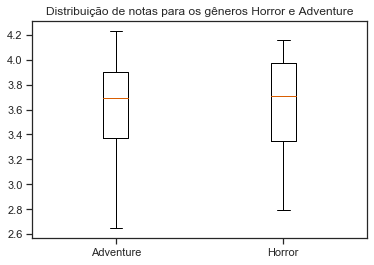

In [443]:
# plotando boxplot para notas dos filmes do gênero Adventure e Horror
plt.boxplot([nota_adventure['Adventure'],nota_horror['Horror']], labels = ['Adventure','Horror'])
plt.title('Distribuição de notas para os gêneros Horror e Adventure')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: Os dois filmes aparentam possuir notas semelhantes, não existindo diferença significativa entre os dois gêneros.



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Histograma de notas de filmes de aventura')

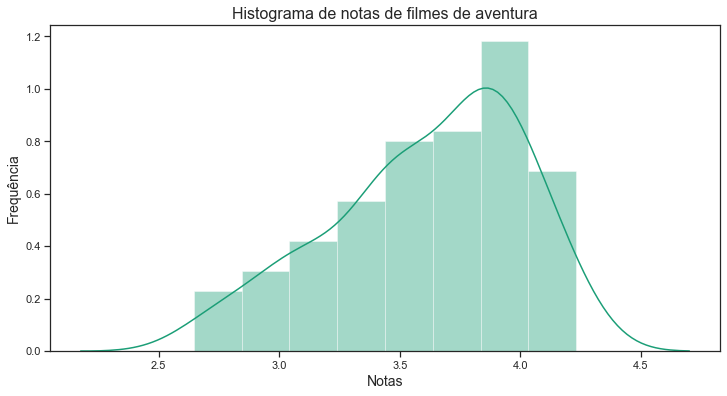

In [444]:
# solucao histograma de aventura
nota_adventure_hist = sns.distplot(nota_adventure['Adventure'], norm_hist = False, kde = True)
nota_adventure_hist.figure.set_size_inches(12,6)
nota_adventure_hist.set_xlabel('Notas', fontsize = 14)
nota_adventure_hist.set_ylabel('Frequência', fontsize = 14)
nota_adventure_hist.set_title('Histograma de notas de filmes de aventura',fontsize = 16)

Text(0.5, 1.0, 'Histograma de notas de filmes de horror')

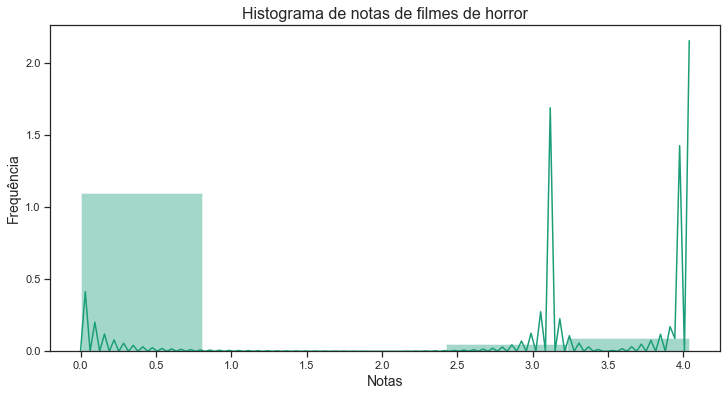

In [445]:
# solucao histograma de horror
nota_horror_hist = sns.distplot(nota_horror['Adventure'], norm_hist = False, kde = True)
nota_horror_hist.figure.set_size_inches(12,6)
nota_horror_hist.set_xlabel('Notas', fontsize = 14)
nota_horror_hist.set_ylabel('Frequência', fontsize = 14)
nota_horror_hist.set_title('Histograma de notas de filmes de horror',fontsize = 16)

In [446]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
# utilizando teste de normalidade de Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(nota_adventure)
print("O valor estatístico de Shapiro-Wilk é " + str(shapiro_stat))
print("O valor de p de Shapiro-Wilk é " + str(shapiro_p_value))

O valor estatístico de Shapiro-Wilk é 0.5114635229110718
O valor de p de Shapiro-Wilk é 0.0


In [447]:
# conclusão do teste de normalidade de filmes de adventure
if shapiro_p_value > 0.05:
    print("Com 95% de confiança, os dados seguem uma distribuição normal segundo o teste de Shapiro-Wilk")
else:
    print("Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk")

Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk


In [448]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
# utilizando teste de normalidade de Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(nota_adventure)
print("O valor estatístico de Shapiro-Wilk é " + str(shapiro_stat))
print("O valor de p de Shapiro-Wilk é " + str(shapiro_p_value))

O valor estatístico de Shapiro-Wilk é 0.5114635229110718
O valor de p de Shapiro-Wilk é 0.0


In [449]:
# conclusão do teste de normalidade de filmes de horror
if shapiro_p_value > 0.05:
    print("Com 95% de confiança, os dados seguem uma distribuição normal segundo o teste de Shapiro-Wilk")
else:
    print("Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk")

Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk


In [450]:
# solução com o teste desejado
# aplicando um teste de comparação das distribuições
statstic, pvalue = ttest_ind(nota_adventure.mean(), nota_horror.mean())
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 0.4316065192828905
O valor de p é 0.6686013354966275


In [451]:
# conclusão da minha hipótese
if pvalue > 0.05:
    print("Com 95% de confiança, os filmes do gênero adventure possuem uma avalição melhor em relação aos filmes de horror")
else:
    print("Com 95% de confiança, os filmes do gênero adventure não possuem uma avalição melhor em relação aos filmes de horror")

Com 95% de confiança, os filmes do gênero adventure possuem uma avalição melhor em relação aos filmes de horror


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: Apesar de aparentemente não existir diferença significativa de nota entre os dois gêneros, filmes Adventure, segundo avaliação utilizando ttest, possui uma avaliação melhor em relação à filmes de Horror. Isso pode ocorrer devido a maior quantidade de votos para o gênero Adventure.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: Recomendo fazer um filme do gênero Adventure. Filmes do gênero Adventure não possuem em média notas muito superiores ao gênero, porém ao realizar testes estatísticos, nota-se que há sim uma diferença significativa na nota média de filmes de Adventure em relação à Horror. Essa diferença aparenta se dar principalmente pela quantidade de pessoas que votaram nos filmes de Adventure serem muito superiores à filmes de Horror.



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [452]:
# solução: calculando os 2 generos mais votados
votos_por_genero_por_filme_sum[0:2]

Action    15734.0
Drama     15445.0
dtype: float64

In [453]:
# solução: encontrando os top 5 filmes desses generos
top5_filmes = filmes[['titulo','Action','Drama','nota_media','total_de_votos']].query('Action == 1' or 'Drama == 1')
top5_filmes.sort_values(by=['nota_media'], ascending = False).head()

,titulo,Action,Drama,nota_media,total_de_votos
filmeId,,,,,
2959,Fight Club (1999),1,1,4.272936,218.0
58559,"Dark Knight, The (2008)",1,1,4.238255,149.0
1197,"Princess Bride, The (1987)",1,0,4.232394,142.0
260,Star Wars: Episode IV - A New Hope (1977),1,0,4.231076,251.0
1208,Apocalypse Now (1979),1,1,4.219626,107.0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [454]:
# solucao
# 2 maiores valores de correlação: Drama e Comedy
# 2 menores valores de correlação: Documentary e Musical
filmes[['nota_media','Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']
      ].corr().sort_values(by=['nota_media'],ascending = False)

,nota_media,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
nota_media,1.000000,-0.154089,-0.079985,0.043071,-0.030360,-0.256005,0.190220,-0.003486,0.277662,-0.020986,0.081766,-0.033877,0.064931,-0.008529,0.129914,-0.072002,-0.136717,-0.016782,0.125615,-0.059642
Drama,0.277662,-0.253573,-0.290255,-0.121935,-0.125559,-0.288999,0.092210,0.018156,1.000000,-0.121680,-0.023335,-0.110364,-0.082535,-0.081810,0.016269,0.066415,-0.159169,-0.037764,0.205919,-0.012197
Crime,0.190220,0.061890,-0.241256,-0.091665,-0.130389,-0.126158,1.000000,-0.032710,0.092210,-0.155243,0.193444,-0.048878,-0.032924,-0.108315,0.114410,-0.207496,-0.178411,0.248836,-0.074806,-0.081033
Mystery,0.129914,-0.063915,-0.090344,-0.052933,-0.077583,-0.200222,0.114410,-0.020292,0.016269,-0.035543,0.311831,0.130315,0.021028,-0.067193,1.000000,-0.064884,-0.015237,0.320529,-0.063765,-0.050269
War,0.125615,0.070618,-0.086730,-0.058093,-0.071703,-0.082082,-0.074806,-0.014029,0.205919,-0.055809,-0.019884,-0.051993,-0.008336,-0.046454,-0.063765,-0.016625,-0.106436,-0.052561,1.000000,0.033838
FilmNoir,0.081766,-0.022520,-0.061015,-0.026203,-0.032341,-0.077683,0.193444,-0.006328,-0.023335,-0.039262,1.000000,-0.023451,-0.024394,-0.020953,0.311831,-0.045701,-0.048008,0.156159,-0.019884,-0.015675
IMAX,0.064931,0.129896,0.217954,0.107701,0.092512,-0.155010,-0.032924,-0.017211,-0.082535,0.153250,-0.024394,-0.024358,1.000000,0.030240,0.021028,-0.077298,0.120340,-0.010974,-0.008336,-0.042636
Animation,0.043071,-0.173589,0.163576,1.000000,0.753654,0.125706,-0.091665,-0.018487,-0.121935,0.227460,-0.026203,-0.068516,0.107701,0.430701,-0.052933,0.021108,-0.097383,-0.167796,-0.058093,-0.045797
Documentary,-0.003486,-0.050596,-0.043048,-0.018487,-0.022818,0.013323,-0.032710,1.000000,0.018156,-0.027700,-0.006328,-0.016545,-0.017211,-0.014783,-0.020292,-0.032243,-0.033871,-0.040520,-0.014029,-0.011059
Musical,-0.008529,-0.145649,-0.049984,0.430701,0.406724,0.054861,-0.108315,-0.014783,-0.081810,0.146522,-0.020953,-0.009633,0.030240,1.000000,-0.067193,0.081647,-0.086035,-0.134176,-0.046454,-0.036621


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [455]:
# solucao
# 2 maiores valores de correlação: Comedy e Adventure
# 2 menores valores de correlação: Children e Mystery
filmes[['total_de_votos','Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']
      ].corr().sort_values(by=['total_de_votos'],ascending = False).round(3)

,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
total_de_votos,1.000,0.066,0.104,0.023,0.002,-0.129,0.080,-0.055,0.019,-0.010,-0.039,-0.036,-0.016,-0.025,-0.007,-0.045,0.064,0.086,0.088,-0.061
Adventure,0.104,0.334,1.000,0.164,0.179,-0.091,-0.241,-0.043,-0.290,0.243,-0.061,-0.097,0.218,-0.050,-0.090,-0.174,0.279,-0.005,-0.087,0.045
War,0.088,0.071,-0.087,-0.058,-0.072,-0.082,-0.075,-0.014,0.206,-0.056,-0.020,-0.052,-0.008,-0.046,-0.064,-0.017,-0.106,-0.053,1.000,0.034
Thriller,0.086,0.311,-0.005,-0.168,-0.207,-0.365,0.249,-0.041,-0.038,-0.181,0.156,0.065,-0.011,-0.134,0.321,-0.203,0.140,1.000,-0.053,-0.100
Crime,0.080,0.062,-0.241,-0.092,-0.130,-0.126,1.000,-0.033,0.092,-0.155,0.193,-0.049,-0.033,-0.108,0.114,-0.207,-0.178,0.249,-0.075,-0.081
Action,0.066,1.000,0.334,-0.174,-0.213,-0.292,0.062,-0.051,-0.254,-0.118,-0.023,-0.009,0.130,-0.146,-0.064,-0.200,0.326,0.311,0.071,0.047
SciFi,0.064,0.326,0.279,-0.097,-0.101,-0.214,-0.178,-0.034,-0.159,-0.148,-0.048,0.016,0.120,-0.086,-0.015,-0.188,1.000,0.140,-0.106,-0.016
Animation,0.023,-0.174,0.164,1.000,0.754,0.126,-0.092,-0.018,-0.122,0.227,-0.026,-0.069,0.108,0.431,-0.053,0.021,-0.097,-0.168,-0.058,-0.046
Drama,0.019,-0.254,-0.290,-0.122,-0.126,-0.289,0.092,0.018,1.000,-0.122,-0.023,-0.110,-0.083,-0.082,0.016,0.066,-0.159,-0.038,0.206,-0.012
Children,0.002,-0.213,0.179,0.754,1.000,0.120,-0.130,-0.023,-0.126,0.372,-0.032,-0.085,0.093,0.407,-0.078,-0.016,-0.101,-0.207,-0.072,-0.057


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

In [456]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Text(0.5, 1.0, 'Relação entre ano de lançamento e nota média')

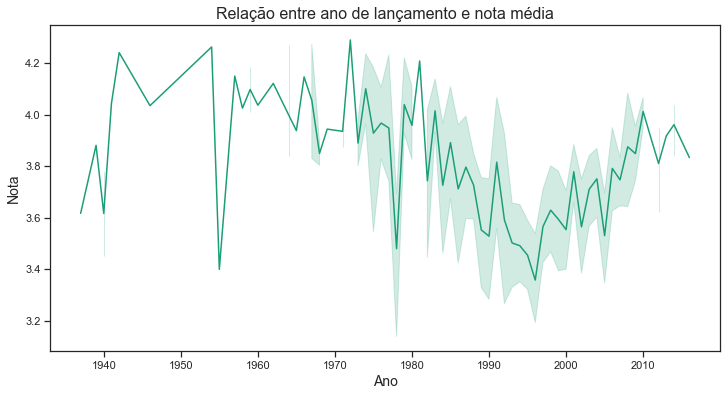

In [457]:
# solucao
lineplot_nota_ano = sns.lineplot(data = filmes,x = 'ano_de_lancamento',y = 'nota_media')
lineplot_nota_ano.figure.set_size_inches(12,6)
lineplot_nota_ano.set_xlabel('Ano', fontsize = 14)
lineplot_nota_ano.set_ylabel('Nota', fontsize = 14)
lineplot_nota_ano.set_title('Relação entre ano de lançamento e nota média',fontsize = 16)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [458]:
# solução (código)
filmes[['ano_de_lancamento','nota_media']].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


### Solução (explicação)
#### Uma quantidade de maior de amostras nos últimos anos.



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

In [459]:
# solução
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
infos.head()

,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,
1,1995.0,3.920930,215.0
2,1995.0,3.431818,110.0
3,1995.0,3.259615,52.0
6,1995.0,3.946078,102.0
7,1995.0,3.185185,54.0


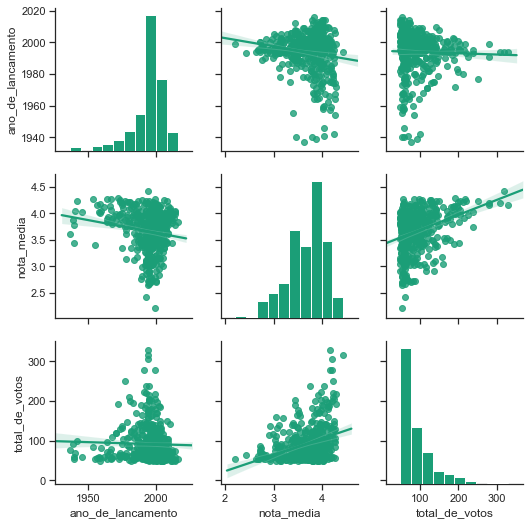

In [460]:
sns.pairplot(data = infos, kind = 'reg')

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [461]:
animation = filmes.query('Animation > 0')

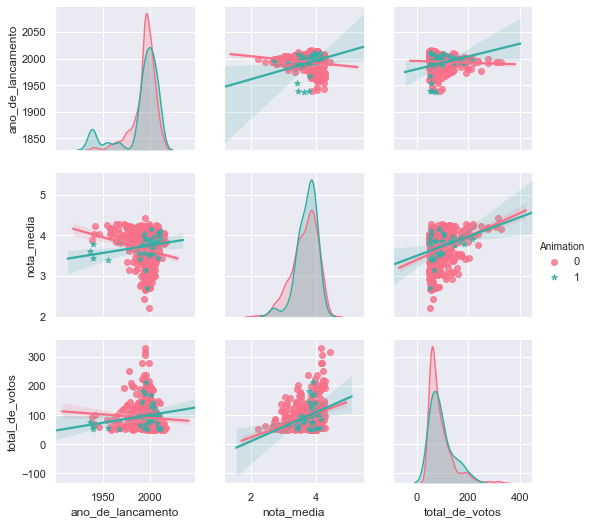

In [462]:
sns.set(color_codes=True,)
animation_pairplot = sns.pairplot(data = filmes, y_vars = ['ano_de_lancamento',
        'nota_media','total_de_votos'] , x_vars = ['ano_de_lancamento',
        'nota_media','total_de_votos'] ,hue = 'Animation', kind = 'reg',palette="husl",markers=['o','*'])

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução: Apesar de haver uma baixa correlação, é possível ver que a nota média de filmes de Animation aumentaram com o passar dos anos e apresenta um correlação positiva.
### O total de votos aumentou conforme o passar dos anos, apresentando uma correlação positiva.
### Existe uma correlação positiva entre o total de votos x nota média. Algumas correlações, como nota média x ano de lançamento e total de votos x ano de lançamento de outros filmes são inversas em relação a filmes Animation.
### Houve um aumento no número de votos e nota média consideráveis com o passar do tempo. Pode estar relacionado a estabilização da média das notas conforme o número de amostras aumenta.



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [463]:
# solução

In [464]:
cinco_maiores_medias = filmes.sort_values(by = 'nota_media',ascending = False).head(5)

In [465]:
# verificando se há diferença significativa entre a maior nota média e as 4 demais notas.
cinco_maiores_medias = filmes.sort_values(by = 'nota_media',ascending = False).head(5)
cinco_maiores_medias

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,4.268041,97.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Visualizando com histograma

In [466]:
sns.set_palette("Dark2")
sns.set_style('ticks')

Text(0.5, 1.0, 'Nota media por filmes (cinco maiores notas)')

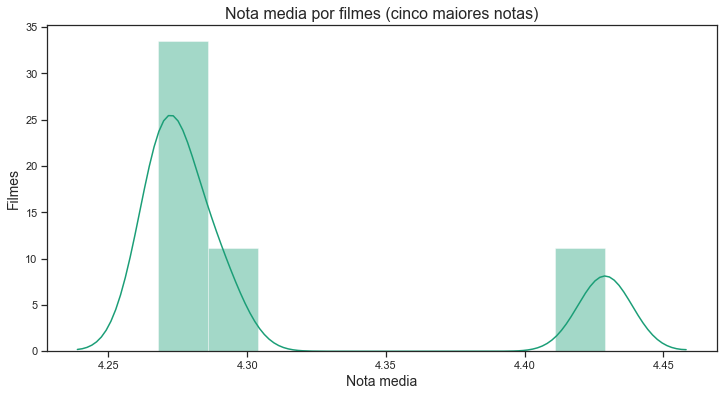

In [467]:
cinco_maiores_medias_hist = sns.distplot(cinco_maiores_medias['nota_media'])
cinco_maiores_medias_hist.figure.set_size_inches(12,6)
cinco_maiores_medias_hist.set_xlabel('Nota media', fontsize = 14)
cinco_maiores_medias_hist.set_ylabel('Filmes', fontsize = 14)
cinco_maiores_medias_hist.set_title('Nota media por filmes (cinco maiores notas)',fontsize = 16)

### Aparentemente existe uma diferença entre o filme com maior nota media e os filmes 4 filmes seguintes. Irei aplicar um teste estátistico para confirmar se há realmente diferença entre eles.
### Minha teoria é que o filme The Shawshank Redemption, possui uma nota media maior do que os filmes seguintes, porem estes não possuem diferença significativa entre eles.

In [468]:
# Nota média do segundo ao quinto filmes com maiores notas
filmes_comparacao = filmes.query('filmeId in [858,2959,1276,750]')
filmes_comparacao.sort_values(by = 'nota_media', ascending = False)

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,4.268041,97.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Atribuindo valores para 5 maiores filmes

In [469]:
notas318 = notas.query('filmeId == 318')
notas318.nota.mean()

4.429022082018927

In [470]:
notas858 = notas.query('filmeId == 858')
notas858.nota.mean()

4.2890625

In [471]:
notas2959 = notas.query('filmeId == 2959')
notas2959.nota.mean()

4.272935779816514

In [472]:
notas1276 = notas.query('filmeId == 1276')
notas1276.nota.mean()

4.271929824561403

In [473]:
notas750 = notas.query('filmeId == 750')
notas750.nota.mean()

4.268041237113402

### A hipotese nula me diz que não existe diferença entre a média dos dois filmes, considerando p value = 0.05

In [474]:
# aplicando teste comparativo entre primeiro e segundo filmes com maior nota media
statstic, pvalue = ttest_ind(notas318.nota, notas858.nota)
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 1.9359504727033352
O valor de p é 0.05342929201672729


In [475]:
# conclusão da minha primeira hipótese
if pvalue > 0.05:
    print("Com 95% de confiança, não existe diferença entre a média dos filmes comparados")
else:
    print("Com 95% de confiança, existe diferença entre a média dos filmes comparados")

Com 95% de confiança, não existe diferença entre a média dos filmes comparados


In [476]:
# aplicando teste comparativo entre segundo e teceiro filmes com maior nota media
statstic, pvalue = ttest_ind(notas858.nota, notas2959.nota)
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 0.18479260890136148
O valor de p é 0.8534835248573589


In [477]:
if pvalue > 0.05:
    print("Com 95% de confiança, não existe diferença entre a média dos filmes comparados")
else:
    print("Com 95% de confiança, existe diferença entre a média dos filmes comparados")

Com 95% de confiança, não existe diferença entre a média dos filmes comparados


In [478]:
# aplicando teste comparativo entre terceiro e quarto filmes com maior nota media
statstic, pvalue = ttest_ind(notas2959.nota, notas1276.nota)
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 0.00826939729559238
O valor de p é 0.9934080903427058


In [479]:
if pvalue > 0.05:
    print("Com 95% de confiança, não existe diferença entre a média dos filmes comparados")
else:
    print("Com 95% de confiança, existe diferença entre a média dos filmes comparados")

Com 95% de confiança, não existe diferença entre a média dos filmes comparados


### É possível observar que comparando os filmes com diferença de valores médios aparentemente menores, o Pvalue apresenta um valor mais próximo a 100%.
### Podemos afirmar que não existe diferença estátistica significativa entre os 5 primeiros filmes com maior nota média.